In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4af04f0c-0897-43c6-8841-0b58c7795cc3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\qmiku\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9983,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.929290e+07,1.929290e+07,NaN,1,NaN,NaN,None,2023-02-16T16:27:00.000Z,24795.931344,3.872514e+10,49.3854,1.026520,8.804441,9.895950,17.300416,48.403074,48.475573,4.783854e+11,42.7349,5.207146e+11,None,2023-02-16T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 16:28:48.767304
1,1027,Ethereum,ETH,ethereum,6465,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-16T16:27:00.000Z,1706.125273,1.308143e+10,69.1932,1.084511,8.029360,4.872842,8.694415,44.813734,40.742772,2.087851e+11,18.6526,2.087851e+11,None,2023-02-16T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 16:28:48.767304
2,825,Tether,USDT,tether,47678,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.978573e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-16T16:27:00.000Z,1.000226,5.490785e+10,45.6362,-0.001759,-0.005593,0.007447,0.011012,0.006404,0.091352,6.980152e+10,6.2357,7.315832e+10,None,2023-02-16T16:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-16 16:28:48.767304
3,1839,BNB,BNB,bnb,1190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.578981e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-16T16:27:00.000Z,321.805364,9.771806e+08,88.1184,0.527306,6.366350,1.461394,6.452606,31.084155,18.423087,5.081245e+10,4.5419,6.436107e+10,None,2023-02-16T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 16:28:48.767304
4,3408,USD Coin,USDC,usd-coin,10120,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.160413e+10,4.160413e+10,NaN,5,NaN,NaN,None,2023-02-16T16:27:00.000Z,0.999969,5.541519e+09,47.5773,-0.006321,0.011481,0.000927,0.006428,-0.004251,-0.023636,4.160284e+10,3.7180,4.160284e+10,None,2023-02-16T16:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-16 16:28:48.767304
5,52,XRP,XRP,xrp,886,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.079908e+10,9.998913e+10,NaN,6,NaN,NaN,None,2023-02-16T16:27:00.000Z,0.398893,1.202904e+09,26.9501,0.105988,3.256810,-0.663312,3.059964,13.929886,5.435347,2.026342e+10,1.8103,3.988935e+10,None,2023-02-16T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 16:28:48.767304
6,2010,Cardano,ADA,cardano,649,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.463434e+10,3.548507e+10,NaN,7,NaN,NaN,None,2023-02-16T16:27:00.000Z,0.407229,6.022302e+08,37.9354,0.694006,4.500203,5.609036,15.628202,54.058621,24.550707,1.410411e+10,1.2600,1.832531e+10,None,2023-02-16T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 16:28:48.767304
7,4687,Binance USD,BUSD,binance-usd,6214,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.385259e+10,1.385259e+10,NaN,8,NaN,NaN,None,2023-02-16T16:27:00.000Z,1.000071,1.276310e+10,52.6204,0.012053,0.025836,0.029540,-0.010665,0.002643,-0.044188,1.385358e+10,1.2376,1.385358e+10,None,2023-02-16T16:27:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-02-16 16:28:48.767304
8,3890,Polygon,MATIC,polygon,587,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,9,NaN,NaN,None,2

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '4af04f0c-0897-43c6-8841-0b58c7795cc3',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\qmiku\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\qmiku\AppData\Local\Temp\ipykernel_18532\1634533913.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\qmiku\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\qmiku\AppData\Local\Temp\ipykernel_18532\1634533913.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\qmiku\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\qmiku\AppData\Local\Temp\ipykernel_18532\1634533913.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\qmiku\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\qmiku\AppData\Local\Temp\ipykernel_18532\1634533913.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\qmiku\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\qmiku\AppData\Local\Temp\ipykernel_18532\1634533913.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9983,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.929290e+07,1.929290e+07,NaN,1,NaN,NaN,None,2023-02-16T16:27:00.000Z,24795.931344,3.872514e+10,49.3854,1.026520,8.804441,9.895950,17.300416,48.403074,48.475573,4.783854e+11,42.7349,5.207146e+11,None,2023-02-16T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 16:28:48.767304
1,1027,Ethereum,ETH,ethereum,6465,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-16T16:27:00.000Z,1706.125273,1.308143e+10,69.1932,1.084511,8.029360,4.872842,8.694415,44.813734,40.742772,2.087851e+11,18.6526,2.087851e+11,None,2023-02-16T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 16:28:48.767304
2,825,Tether,USDT,tether,47678,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.978573e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-16T16:27:00.000Z,1.000226,5.490785e+10,45.6362,-0.001759,-0.005593,0.007447,0.011012,0.006404,0.091352,6.980152e+10,6.2357,7.315832e+10,None,2023-02-16T16:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-16 16:28:48.767304
3,1839,BNB,BNB,bnb,1190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.578981e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-16T16:27:00.000Z,321.805364,9.771806e+08,88.1184,0.527306,6.366350,1.461394,6.452606,31.084155,18.423087,5.081245e+10,4.5419,6.436107e+10,None,2023-02-16T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 16:28:48.767304
4,3408,USD Coin,USDC,usd-coin,10120,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.160413e+10,4.160413e+10,NaN,5,NaN,NaN,None,2023-02-16T16:27:00.000Z,0.999969,5.541519e+09,47.5773,-0.006321,0.011481,0.000927,0.006428,-0.004251,-0.023636,4.160284e+10,3.7180,4.160284e+10,None,2023-02-16T16:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-16 16:28:48.767304
5,52,XRP,XRP,xrp,886,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.079908e+10,9.998913e+10,NaN,6,NaN,NaN,None,2023-02-16T16:27:00.000Z,0.398893,1.202904e+09,26.9501,0.105988,3.256810,-0.663312,3.059964,13.929886,5.435347,2.026342e+10,1.8103,3.988935e+10,None,2023-02-16T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 16:28:48.767304
6,2010,Cardano,ADA,cardano,649,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.463434e+10,3.548507e+10,NaN,7,NaN,NaN,None,2023-02-16T16:27:00.000Z,0.407229,6.022302e+08,37.9354,0.694006,4.500203,5.609036,15.628202,54.058621,24.550707,1.410411e+10,1.2600,1.832531e+10,None,2023-02-16T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 16:28:48.767304
7,4687,Binance USD,BUSD,binance-usd,6214,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.385259e+10,1.385259e+10,NaN,8,NaN,NaN,None,2023-02-16T16:27:00.000Z,1.000071,1.276310e+10,52.6204,0.012053,0.025836,0.029540,-0.010665,0.002643,-0.044188,1.385358e+10,1.2376,1.385358e+10,None,2023-02-16T16:27:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-02-16 16:28:48.767304
8,3890,Polygon,MATIC,polygon,587,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,9,NaN,NaN,None,2

In [8]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9983,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19292900.00000,19292900.00000,NaN,1,NaN,NaN,None,2023-02-16T16:27:00.000Z,24795.93134,38725139068.45873,49.38540,1.02652,8.80444,9.89595,17.30042,48.40307,48.47557,478385423831.40015,42.73490,520714558229.15997,None,2023-02-16T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 16:28:48.767304
1,1027,Ethereum,ETH,ethereum,6465,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-02-16T16:27:00.000Z,1706.12527,13081430109.98401,69.19320,1.08451,8.02936,4.87284,8.69441,44.81373,40.74277,208785145968.00250,18.65260,208785145968.00000,None,2023-02-16T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 16:28:48.767304
2,825,Tether,USDT,tether,47678,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,69785731024.84929,73141766321.23428,NaN,3,NaN,NaN,None,2023-02-16T16:27:00.000Z,1.00023,54907854485.13580,45.63620,-0.00176,-0.00559,0.00745,0.01101,0.00640,0.09135,69801523095.16032,6.23570,73158317841.14000,None,2023-02-16T16:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-16 16:28:48.767304
3,1839,BNB,BNB,bnb,1190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,157898084.40965,159979963.59043,NaN,4,NaN,NaN,None,2023-02-16T16:27:00.000Z,321.80536,977180589.68137,88.11840,0.52731,6.36635,1.46139,6.45261,31.08415,18.42309,50812450542.23965,4.54190,64361072817.59000,None,2023-02-16T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 16:28:48.767304
4,3408,USD Coin,USDC,usd-coin,10120,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,41604130223.61251,41604130223.61251,NaN,5,NaN,NaN,None,2023-02-16T16:27:00.000Z,0.99997,5541519268.82847,47.57730,-0.00632,0.01148,0.00093,0.00643,-0.00425,-0.02364,41602837362.92403,3.71800,41602837362.92000,None,2023-02-16T16:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-16 16:28:48.767304
5,52,XRP,XRP,xrp,886,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50799084881.00000,99989130718.00000,NaN,6,NaN,NaN,None,2023-02-16T16:27:00.000Z,0.39889,1202903516.05290,26.95010,0.10599,3.25681,-0.66331,3.05996,13.92989,5.43535,20263424075.42023,1.81030,39889348642.58000,None,2023-02-16T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 16:28:48.767304
6,2010,Cardano,ADA,cardano,649,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34634342831.42300,35485065064.78300,NaN,7,NaN,NaN,None,2023-02-16T16:27:00.000Z,0.40723,602230215.20311,37.93540,0.69401,4.50020,5.60904,15.62820,54.05862,24.55071,14104110766.49914,1.26000,18325307559.08000,None,2023-02-16T16:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-16 16:28:48.767304
7,4687,Binance USD,BUSD,binance-usd,6214,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,13852590522.86338,13852590522.86338,NaN,8,NaN,NaN,None,2023-02-16T16:27:00.000Z,1.00007,12763095478.41254,52.62040,0.01205,0.02584,0.02954,-0.01067,0.00264,-0.04419,13853575197.63382,1.23760,13853575197.63000,None,2023-02-16T16:27:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2023-02-16 16:28:48.7673

In [10]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.24303,8.97818,10.15353,17.40318,48.71319,48.89027
Ethereum,1.43076,8.30478,5.21782,8.87746,45.21215,41.27974
Tether,-0.00111,-0.00875,0.00608,0.01046,0.00336,0.09277
BNB,0.64152,6.52152,1.55710,6.49663,31.27194,18.62016
USD Coin,0.01282,0.02424,0.02143,0.01616,0.00917,-0.00708
XRP,0.19167,3.23012,-0.60355,2.96731,13.95991,5.55078
Cardano,0.96498,4.68448,5.89771,15.67934,54.32064,24.92264
Binance USD,0.01129,0.02499,0.00116,0.00386,0.01418,-0.02078
Polygon,0.38105,11.14991,7.81384,39.98735,75.20090,60.09831


In [11]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     1.24303
             quote.USD.percent_change_24h    8.97818
             quote.USD.percent_change_7d    10.15353
             quote.USD.percent_change_30d   17.40318
             quote.USD.percent_change_60d   48.71319
             quote.USD.percent_change_90d   48.89027
Ethereum     quote.USD.percent_change_1h     1.43076
             quote.USD.percent_change_24h    8.30478
             quote.USD.percent_change_7d     5.21782
             quote.USD.percent_change_30d    8.87746
             quote.USD.percent_change_60d   45.21215
             quote.USD.percent_change_90d   41.27974
Tether       quote.USD.percent_change_1h    -0.00111
             quote.USD.percent_change_24h   -0.00875
             quote.USD.percent_change_7d     0.00608
             quote.USD.percent_change_30d    0.01046
             quote.USD.percent_change_60d    0.00336
             quote.USD.percent_change_90d    0.09277
BNB 

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                             
Bitcoin     quote.USD.percent_change_1h   1.24303
            quote.USD.percent_change_24h  8.97818
            quote.USD.percent_change_7d  10.15353
            quote.USD.percent_change_30d 17.40318
            quote.USD.percent_change_60d 48.71319
            quote.USD.percent_change_90d 48.89027
Ethereum    quote.USD.percent_change_1h   1.43076
            quote.USD.percent_change_24h  8.30478
            quote.USD.percent_change_7d   5.21782
            quote.USD.percent_change_30d  8.87746
            quote.USD.percent_change_60d 45.21215
            quote.USD.percent_change_90d 41.27974
Tether      quote.USD.percent_change_1h  -0.00111
            quote.USD.percent_change_24h -0.00875
            quote.USD.percent_change_7d   0.00608
            quote.USD.percent_change_30d  0.01046
            quote.USD.percent_change_60d  0.00336
            quote.USD.percent_change_90d  0.09277
BNB         quote.USD.percent_change_1h   0.64152
            quote.USD.percent_change_24h  6.52152
            quote.USD.percent_change_7d   1.55710
            quote.USD.percent_change_30d  6.49663
            quote.USD.percent_change_60d 31.27194
            quote.USD.percent_change_90d 18.62016
USD Coin    quote.USD.percent_change_1h   0.01282
            quote.USD.percent_change_24h  0.02424
            quote.USD.percent_change_7d   0.02143
            quote.USD.percent_change_30d  0.01616
            quote.USD.percent_change_60d  0.00917
            quote.USD.percent_change_90d -0.00708
XRP         quote.USD.percent_change_1h   0.19167
            quote.USD.percent_change_24h  3.23012
            quote.USD.percent_change_7d  -0.60355
            quote.USD.percent_change_30d  2.96731
            quote.USD.percent_change_60d 13.95991
            quote.USD.percent_change_90d  5.55078
Cardano     quote.USD.percent_change_1h   0.96498
            quote.USD.percent_change_24h  4.68448
            quote.USD.percent_change_7d   5.89771
            quote.USD.percent_change_30d 15.67934
            quote.USD.percent_change_60d 54.32064
            quote.USD.percent_change_90d 24.92264
Binance USD quote.USD.percent_change_1h   0.01129
            quote.USD.percent_change_24h  0.02499
            quote.USD.percent_change_7d   0.00116
            quote.USD.percent_change_30d  0.00386
            quote.USD.percent_change_60d  0.01418
            quote.USD.percent_change_90d -0.02078
Polygon     quote.USD.percent_change_1h   0.38105
            quote.USD.percent_change_24h 11.14991
            quote.USD.percent_change_7d   7.81384
            quote.USD.percent_change_30d 39.98735
            quote.USD.percent_change_60d 75.20090
            quote.USD.percent_change_90d 60.09831
Dogecoin    quote.USD.percent_change_1h   1.06054
            quote.USD.percent_change_24h  3.47857
            quote.USD.percent_change_7d   1.60552
            quote.USD.percent_change_30d  6.43279
            quote.USD.percent_change_60d 14.00888
            quote.USD.percent_change_90d  4.88863
Solana      quote.USD.percent_change_1h   0.48931
            quote.USD.percent_change_24h  5.23792
            quote.USD.percent_change_7d   4.57338
            quote.USD.percent_change_30d  1.70327
            quote.USD.percent_change_60d 91.09898
            quote.USD.percent_change_90d 76.79818
Polkadot    quote.USD.percent_change_1h   0.61730
            quote.USD.percent_change_24h  5.03345
            quote.USD.percent_change_7d  -2.97673
            quote.USD.percent_change_30d  9.33539
            quote.USD.percent_change_60d 42.52211
            quote.USD.percent_change_90d 16.06255
Shiba Inu   quote.USD.percent_change_1h   1.75110
            quote.USD.percent_change_24h  3.63272
            quote.USD.percent_change_7d   3.85247
            quote.USD.percent_change_30d 28.56714
            quote.USD.percent_change_60d 60.36328
            quote.USD.percent_change_90d 50.36397
Litecoin    quote.USD.percent_change_1h   0

In [14]:
df5.count()

values    90
dtype: int64

In [15]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.24303
1,Bitcoin,quote.USD.percent_change_24h,8.97818
2,Bitcoin,quote.USD.percent_change_7d,10.15353
3,Bitcoin,quote.USD.percent_change_30d,17.40318
4,Bitcoin,quote.USD.percent_change_60d,48.71319
5,Bitcoin,quote.USD.percent_change_90d,48.89027
6,Ethereum,quote.USD.percent_change_1h,1.43076
7,Ethereum,quote.USD.percent_change_24h,8.30478
8,Ethereum,quote.USD.percent_change_7d,5.21782
9,Ethereum,quote.USD.percent_change_30d,8.87746


In [16]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.24303
1,Bitcoin,quote.USD.percent_change_24h,8.97818
2,Bitcoin,quote.USD.percent_change_7d,10.15353
3,Bitcoin,quote.USD.percent_change_30d,17.40318
4,Bitcoin,quote.USD.percent_change_60d,48.71319
5,Bitcoin,quote.USD.percent_change_90d,48.89027
6,Ethereum,quote.USD.percent_change_1h,1.43076
7,Ethereum,quote.USD.percent_change_24h,8.30478
8,Ethereum,quote.USD.percent_change_7d,5.21782
9,Ethereum,quote.USD.percent_change_30d,8.87746


In [17]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,1.24303
1,Bitcoin,24h,8.97818
2,Bitcoin,7d,10.15353
3,Bitcoin,30d,17.40318
4,Bitcoin,60d,48.71319
5,Bitcoin,90d,48.89027
6,Ethereum,1h,1.43076
7,Ethereum,24h,8.30478
8,Ethereum,7d,5.21782
9,Ethereum,30d,8.87746


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

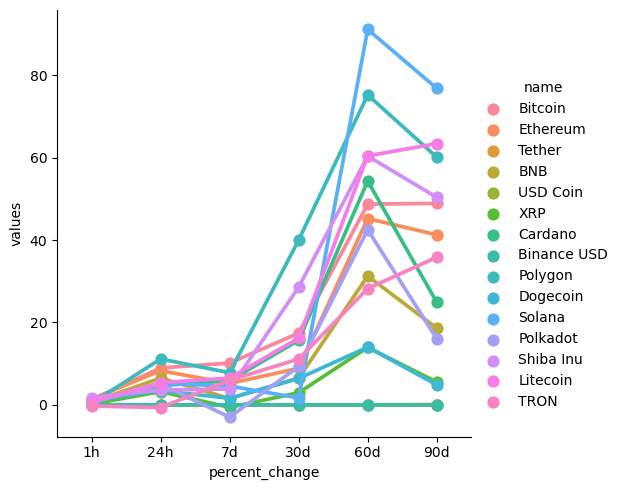

In [19]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [20]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,24795.93134,2023-02-16 16:28:48.767304
0,Bitcoin,24801.57489,2023-02-16 16:31:44.676949
0,Bitcoin,24824.21140,2023-02-16 16:32:44.843408
0,Bitcoin,24853.50078,2023-02-16 16:33:45.039423
0,Bitcoin,24860.50004,2023-02-16 16:34:45.295275
0,Bitcoin,24936.17319,2023-02-16 16:35:45.489954
